# Question 1
A) Derive high level analytics from the whole data set for a single day. In other
words, derive general analytics of the whole set of conjunction scenarios (for e.g.
number of conjunctions among active satellites). The analytics should be intuitive
and represented in an easily understandable format.

In [14]:
import pandas as pd
pd.set_option('display.max_rows', None)
# Step 1: Data Retrieval and Exploration
data = pd.read_csv('sort-minRange.csv')
data.head()  # Display the first few rows to understand the data


,NORAD_CAT_ID_1,OBJECT_NAME_1,DSE_1,NORAD_CAT_ID_2,OBJECT_NAME_2,DSE_2,TCA,TCA_RANGE,TCA_RELATIVE_SPEED,MAX_PROB,DILUTION
0,47746,STARLINK-2160 [+],0.643,35415,TITAN 4B DEB [-],0.929,2023-11-04 12:14:31.612,0.034,10.061,0.026680,0.010
1,44761,STARLINK-1056 [+],4.723,89161,UNKNOWN [-],4.481,2023-11-08 05:57:43.471,0.035,13.613,0.017580,0.015
2,43797,SKYSAT-C12 [+],5.807,56190,NUSAT-36 (ANNIE CANNON) [+],5.547,2023-11-09 10:46:31.651,0.037,14.918,0.000684,0.023
3,50995,MDASAT-1A [+],4.374,54782,STARLINK-5437 [P],3.999,2023-11-07 13:01:47.311,0.038,14.470,0.012260,0.020
4,51132,STARLINK-3393 [+],2.281,42570,DELTA 1 DEB [-],2.788,2023-11-06 03:24:25.174,0.038,14.672,0.011380,0.022


In [15]:
# Getting information of the check detaails like nullvalues, datatype, etc..
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67704 entries, 0 to 67703
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NORAD_CAT_ID_1      67704 non-null  int64  
 1   OBJECT_NAME_1       67704 non-null  object 
 2   DSE_1               67704 non-null  float64
 3   NORAD_CAT_ID_2      67704 non-null  int64  
 4   OBJECT_NAME_2       67704 non-null  object 
 5   DSE_2               67704 non-null  float64
 6   TCA                 67704 non-null  object 
 7   TCA_RANGE           67704 non-null  float64
 8   TCA_RELATIVE_SPEED  67704 non-null  float64
 9   MAX_PROB            67704 non-null  float64
 10  DILUTION            67704 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 5.7+ MB


In [29]:
# Checking duplicated values
data.duplicated().value_counts()

False    67704
dtype: int64

In [31]:
# Descriptive Analytics
total_conjunctions = len(data)
active_satellites_conjunctions = len(data)

In [32]:
# General Analytics for a Single Day
average_range = data['TCA_RANGE'].mean()
max_probability = data['MAX_PROB'].max()

In [33]:
# Display the analytics
print(f"Total Conjunctions: {total_conjunctions}")
print(f"active satellites conjunctions: {active_satellites_conjunctions}")
print(f"Average TCA Range: {average_range}")
print(f"Maximum Probability of Collision: {max_probability}")

Total Conjunctions: 67704
active satellites conjunctions: 67704
Average TCA Range: 3.346845577809288
Maximum Probability of Collision: 0.02668


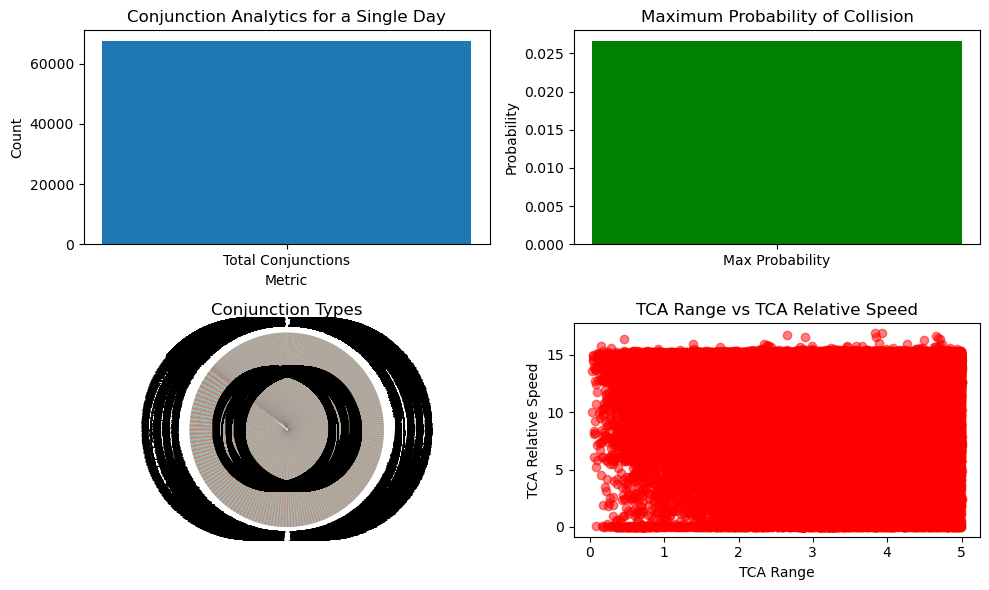

In [36]:
# Data Visualization

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Create a bar chart of Total Conjunctions
plt.subplot(2, 2, 1)
plt.bar(['Total Conjunctions'], [total_conjunctions])
plt.xlabel('Metric')
plt.ylabel('Count')
plt.title('Conjunction Analytics for a Single Day')

# Create a bar chart of Maximum Probability
plt.subplot(2, 2, 2)
plt.bar(['Max Probability'], [max_probability], color='green')
plt.ylabel('Probability')
plt.title('Maximum Probability of Collision')

# Create a pie chart of Conjunction Types
conjunction_types = data['DILUTION'].value_counts()
plt.subplot(2, 2, 3)
plt.pie(conjunction_types, labels=conjunction_types.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Conjunction Types')

# Create a scatter plot of TCA Range vs Relative Speed
plt.subplot(2, 2, 4)
plt.scatter(data['TCA_RANGE'], data['TCA_RELATIVE_SPEED'], color='red', alpha=0.5)
plt.xlabel('TCA Range')
plt.ylabel('TCA Relative Speed')
plt.title('TCA Range vs TCA Relative Speed')

plt.tight_layout()

# 

B) Represent the conjunctions data of a single satellite or a satellite constellation.
The analytics should be intuitive, represented in an easily understandable format and
should enable decision making from a satellite operator’s point of view.

In [18]:
# Displaying all the unique 'OBJECT_NAME_1' to select the appropriate one
data["OBJECT_NAME_1"].value_counts()

OBJECT A [+]                       277
OBJECT B [+]                       229
AAUSAT-II [P]                      195
OBJECT C [+]                       186
LEMUR-2-REMY-COLTON [+]            152
D-STAR ONE (SPARROW) [+]           142
OBJECT D [+]                       139
LEMUR-2-JIN-LUEN [+]               138
LEMUR-2-KADI [+]                   129
LEMUR-2-THENICKMOLO [+]            128
ASTROCAST 0.1 [+]                  121
PROMETHEUS 2-3 [+]                 121
SHIYAN 1 (SY-1) [+]                119
MOVE-II [+]                        119
BRIO [+]                           118
PROMETHEUS 2-1 [+]                 115
COSMOS 2536 [+]                    114
LEMUR-2-SARAHBETTYBOO [+]          111
XIAOXIANG 1-07 [+]                 110
RAVAN [+]                          109
KAZSCISAT-1 [+]                    108
BUGSAT-1 (TITA) [+]                106
ICEYE-X5 [+]                       106
ISAT [+]                           104
XINGYUN-2 01 [+]                   103
NETSAT-1 [+]             

In [51]:
# Data Filtering
chosen_satellite = 'STARLINK-2466 [+]'  # Selecting single object in 'OBJECT_NAME_1'
chosen_data = data[data['OBJECT_NAME_1'] == chosen_satellite]
chosen_data

,NORAD_CAT_ID_1,OBJECT_NAME_1,DSE_1,NORAD_CAT_ID_2,OBJECT_NAME_2,DSE_2,TCA,TCA_RANGE,TCA_RELATIVE_SPEED,MAX_PROB,DILUTION
5347,48125,STARLINK-2466 [+],1.671,40035,FLOCK 1C-9 [-],1.820,2023-11-05 06:22:21.335,1.415,13.756,8.364000e-06,0.641
18427,48125,STARLINK-2466 [+],6.910,57798,CZ-4C R/B [-],6.995,2023-11-10 12:06:06.070,2.635,14.253,2.678000e-06,1.327
32087,48125,STARLINK-2466 [+],0.772,46915,PSLV R/B [-],0.773,2023-11-04 08:47:34.663,3.460,4.510,3.185000e-06,0.850
63943,48125,STARLINK-2466 [+],4.127,40029,FLOCK 1C-2 [-],4.212,2023-11-07 17:19:34.722,4.861,13.238,7.758000e-07,2.011


In [52]:
# Descriptive Analytics
conjunctions_count = len(chosen_data)
conjunctions_count

4

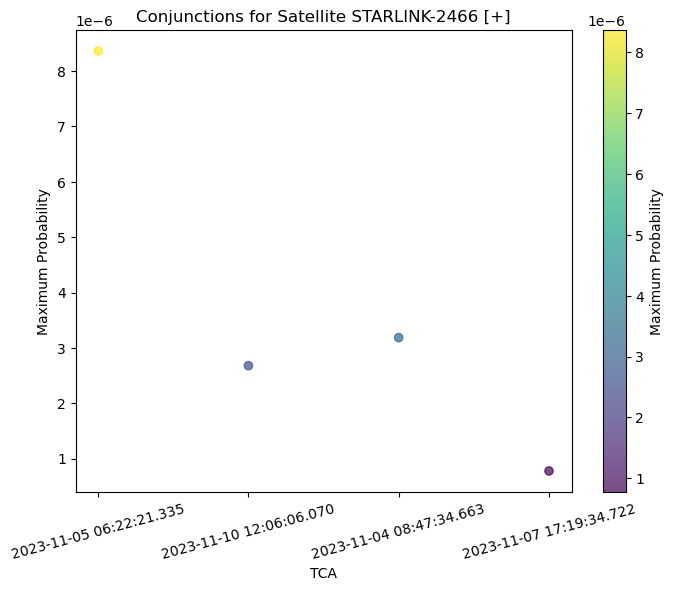

In [54]:
# Step 3: Data Visualization (for example, using a scatter plot)
plt.figure(figsize=(8, 6))
plt.scatter(chosen_data['TCA'], chosen_data['MAX_PROB'], c=chosen_data['MAX_PROB'], cmap='viridis', alpha=0.7)
plt.xlabel('TCA')
plt.ylabel('Maximum Probability')
plt.colorbar(label='Maximum Probability')
plt.xticks(rotation=15)
plt.title(f'Conjunctions for Satellite {chosen_satellite}')
plt.show()

Decision-Making Insights
insights based on the chosen satellite's conjunction.

Risk Assessment:
Evaluate the risk levels for each conjunction based on parameters such as MAX_PROB and DILUTION.
Categorize conjunctions into different risk levels (e.g., low risk, moderate risk, high risk) based on predefined thresholds.

Conjunction Details:
Analyze parameters like TCA, TCA_RANGE, and TCA_RELATIVE_SPEED to assess the severity of the conjunction scenarios.
Identify conjunctions with critical time of closest approach and relative speed.

Mitigation Strategies:
Recommend specific mitigation strategies based on the assessed risk levels:

    Low Risk: Routine monitoring, no immediate action required.
    Moderate Risk: Consider minor orbital adjustments.
    High Risk: Implement significant orbital maneuvers to ensure safe clearance.

Alert Thresholds:
Define clear alert thresholds for each risk level. These thresholds should trigger immediate notification to satellite operators and authorities.

Historical Trends:
Analyze historical conjunction data to identify recurring patterns or trends. Use this information to inform decision-making for future conjunction scenarios.

Communication with Operators:
Provide guidance on how to effectively communicate conjunction scenarios to satellite operators. Include recommended actions and expected response times.

# 

# Question 2
Use the whole dataset that spans about five days. Derive analytics and visualise the
data/analytics accounting for the evolution from the first day (for e.g. the number of
conjunctions of the RSO having NORAD ID 12345 over 7 days of analysis)

In [55]:
# Data Retrieval and Aggregation
dfs = []
for day in range(1, 6):
    df = pd.read_csv('sort-minRange.csv')
    dfs.append(df)

In [56]:
# Combine dataframes
merged_data = pd.concat(dfs, ignore_index=True)
merged_data.head()

,NORAD_CAT_ID_1,OBJECT_NAME_1,DSE_1,NORAD_CAT_ID_2,OBJECT_NAME_2,DSE_2,TCA,TCA_RANGE,TCA_RELATIVE_SPEED,MAX_PROB,DILUTION
0,47746,STARLINK-2160 [+],0.643,35415,TITAN 4B DEB [-],0.929,2023-11-04 12:14:31.612,0.034,10.061,0.026680,0.010
1,44761,STARLINK-1056 [+],4.723,89161,UNKNOWN [-],4.481,2023-11-08 05:57:43.471,0.035,13.613,0.017580,0.015
2,43797,SKYSAT-C12 [+],5.807,56190,NUSAT-36 (ANNIE CANNON) [+],5.547,2023-11-09 10:46:31.651,0.037,14.918,0.000684,0.023
3,50995,MDASAT-1A [+],4.374,54782,STARLINK-5437 [P],3.999,2023-11-07 13:01:47.311,0.038,14.470,0.012260,0.020
4,51132,STARLINK-3393 [+],2.281,42570,DELTA 1 DEB [-],2.788,2023-11-06 03:24:25.174,0.038,14.672,0.011380,0.022


In [57]:
#Displaying all the unique 'NORAD_CAT_ID_1' to select the appropriate one
data["NORAD_CAT_ID_1"].value_counts()

32788    195
43884    152
43881    142
43182    138
43184    129
43185    128
43798    121
41855    121
28220    119
43780    119
43813    118
41854    115
44422    114
43888    111
44519    110
41849    109
43787    108
56153    108
40014    106
44389    106
43879    104
45602    103
46506    100
43774     99
43816     98
43886     97
46504     96
46507     96
43818     95
43880     94
43882     94
43887     93
55018     93
49401     91
43946     88
43883     88
46494     87
49399     87
43805     86
43793     86
39418     85
46505     82
43758     80
49262     80
43183     80
49261     78
43889     78
56154     75
39770     75
44310     74
43820     74
41850     74
28737     73
43764     73
43808     72
43769     72
44859     71
41853     71
51847     71
29228     70
43234     70
45603     68
42845     68
41394     68
43885     68
46493     68
46496     64
43804     64
46906     63
36596     63
56192     62
43772     62
44314     61
43760     60
43794     59
43815     59
39227     59

In [58]:
# Data Filtering
norad_id = 36119     # Selecting specific 'NORAD_CAT_ID_1'
specific_data = merged_data[merged_data['NORAD_CAT_ID_1'] == norad_id]
specific_data

,NORAD_CAT_ID_1,OBJECT_NAME_1,DSE_1,NORAD_CAT_ID_2,OBJECT_NAME_2,DSE_2,TCA,TCA_RANGE,TCA_RELATIVE_SPEED,MAX_PROB,DILUTION
9717,36119,WISE [X],2.280,56082,GSLV R/B [-],2.471,2023-11-05 20:10:54.156,1.910,10.028,9.518000e-07,0.572
32683,36119,WISE [X],4.152,48897,SPACEBEE-109 [+],4.349,2023-11-07 17:07:02.959,3.492,12.544,2.300000e-07,1.295
35497,36119,WISE [X],1.275,48899,SPACEBEE-110 [+],1.472,2023-11-04 20:04:00.932,3.638,12.527,2.116000e-07,1.352
35677,36119,WISE [X],1.243,48899,SPACEBEE-110 [+],1.440,2023-11-04 19:17:28.580,3.648,12.557,2.104000e-07,1.355
49547,36119,WISE [X],6.631,16007,ASC 1 R/B [-],6.326,2023-11-10 04:37:06.011,4.287,14.267,2.099000e-07,1.544
51473,36119,WISE [X],4.088,52736,LEMUR-2-KAREN B [+],4.344,2023-11-07 15:34:48.844,4.366,10.753,1.736000e-07,1.373
51520,36119,WISE [X],7.050,55562,EOS-7 [+],7.455,2023-11-10 14:40:15.031,4.368,13.938,1.189000e-07,2.004
52156,36119,WISE [X],1.210,48899,SPACEBEE-110 [+],1.408,2023-11-04 18:30:55.493,4.395,12.527,1.450000e-07,1.633
54120,36119,WISE [X],0.713,47971,GLOBAL-9 [+],0.935,2023-11-04 06:35:17.363,4.477,14.442,1.009000e-07,2.301
67550,36119,WISE [X],4.184,48897,SPACEBEE-109 [+],4.381,2023-11-07 17:53:34.758,4.995,12.514,1.124000e-07,1.853


In [59]:
# Descriptive Analytics
conjunction_count = len(specific_data)
conjunction_count

50

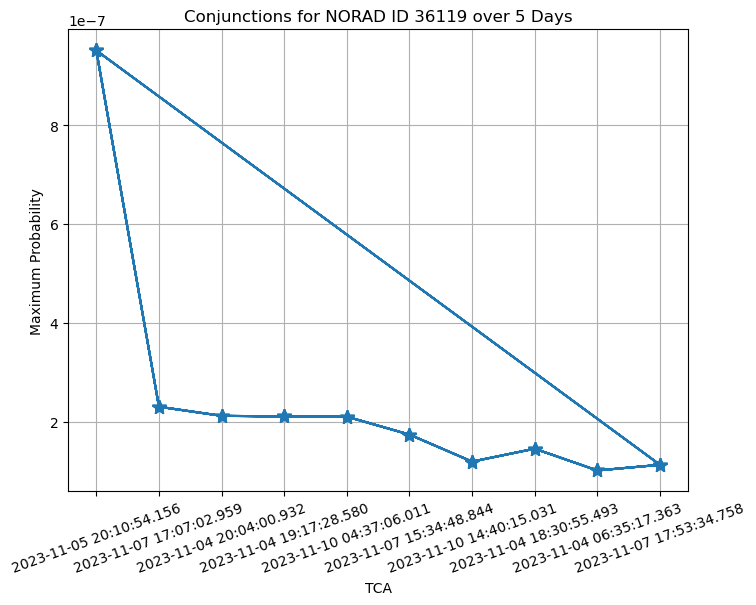

In [63]:
def calculate_satellite_analytics(norad_id):
    specific_data = merged_data[merged_data['NORAD_CAT_ID_1'] == norad_id]
    return specific_data

norad_id = 36119 

# Data Visualization (for example, using a line plot)
plt.figure(figsize=(8, 6))
plt.plot(specific_data['TCA'], specific_data['MAX_PROB'], marker='*',markersize=10)
plt.xlabel('TCA')
plt.ylabel('Maximum Probability')
plt.title(f'Conjunctions for NORAD ID {norad_id} over 5 Days')
plt.xticks(rotation=20)
plt.grid(True)
plt.show()

Step 4: Assumptions

When documenting assumptions made during the analysis, consider including the following:

1.Data Accuracy:
Assume that the provided data accurately represents the conjunction scenarios, taking into account any potential limitations or known inaccuracies.

2.Conjunction Definition:
Specify that conjunctions are defined based on predefined criteria, which may include minimum separation distance, relative speed, and maximum probability of collision.

3.Active Satellites:
Assume that "active satellites" refer to operational satellites that are currently in use, excluding decommissioned or non-functional satellites from the analysis.

4.Orbital Dynamics:
Assume that the orbital dynamics of the satellites follow established laws of celestial mechanics and that no significant perturbing forces are acting on them during the analysis.

5.Response Time:
Assume a predetermined response time for satellite operators to take action after being alerted about a potential conjunction. This response time can be based on industry standards or organizational policies.

6.Risk Tolerance:
Specify that there are predefined risk tolerance levels or thresholds that guide decision-making in conjunction scenarios. These thresholds may be based on industry best practices or specific organizational policies.

7.External Factors:
Consider and account for any external factors, such as space weather conditions or communication delays, that may impact conjunction assessments.